### Part 1. Project Background 

101 Okey Plus  is a hugely popular mobile game developed by Zynga. Organize tiles and ready your hand to reach 101 points, the minimum required to open a hand. Melding sets, runs, or pairs, discard unmatched tiles to finish your hand.

In this project, we're going to analyze AB-test users who register with Facebook or register as a guest. In particular, we will look at the impact on player retention.

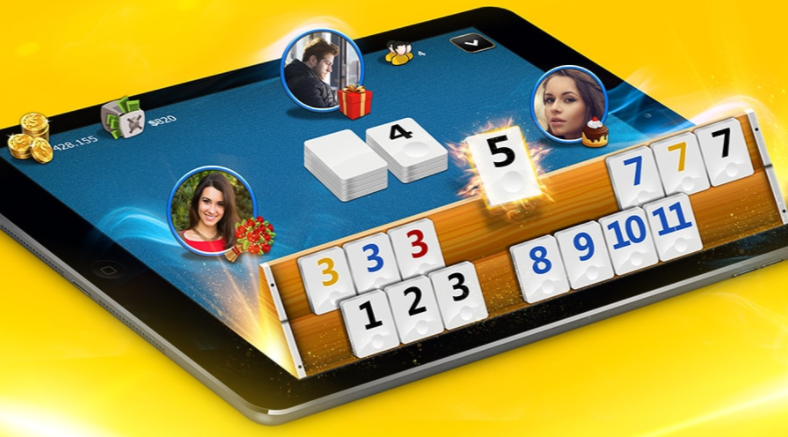

### Part 2. About the Data 
##### 2.1 Load the AB-test data

In [2]:
# Importing pandas
import pandas as pd
import matplotlib.pyplot as plt

# Reading in the data
df = pd.read_csv('okey_plus.csv')

# Showing the first few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7,retention_14
0,116,guest,3,False,False,False
1,337,facebook,38,True,False,False
2,377,guest,165,True,False,False
3,483,facebook,1,False,False,False
4,488,guest,179,True,True,True


In [3]:
df.count()

userid            90189
version           90189
sum_gamerounds    90189
retention_1       90189
retention_7       90189
retention_14      90189
dtype: int64

The data is from 90,189 players that installed the game while the AB-test was running. The variables are:

- **userid** - a unique number that identifies each player.
- **version** - whether the player was put in the control group ( guest) or the test group (Facebook).
- **sum_gamerounds** - the number of game rounds played by the player during the first week after installation
- **retention_1** - did the player come back and play 1 day after installing?
- **retention_7** - did the player come back and play 7 days after installing?
- **retention_14** - did the player come back and play 14 days after installing?

When a player installed the game, he or she randomly registered to either Facebook or guest.

#### 2.2 Check missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 6 columns):
userid            90189 non-null int64
version           90189 non-null object
sum_gamerounds    90189 non-null int64
retention_1       90189 non-null bool
retention_7       90189 non-null bool
retention_14      90189 non-null bool
dtypes: bool(3), int64(2), object(1)
memory usage: 2.3+ MB



Luckily, there is no missing value in this dataset.

#### 2.3 Count the number of players in each group

In [5]:
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7,retention_14
version,,,,,
facebook,48762,48762,48762,48762,48762
guest,41427,41427,41427,41427,41427


When a player installed the game, he or she randomly registered to either Facebook or guest. The number of players is roughly the same in the control and test group, nice!

###  Part 3. Analyzing Player Behavior

We will plot a boxplot to visualize the distribution of 'sum_gamerounds', which would give us a rough idea of how many game rounds were played by a player during the first week after installing the game.

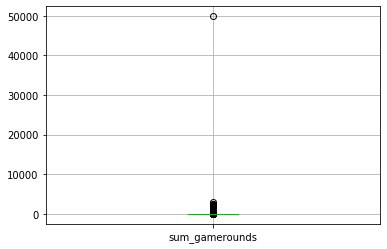

In [6]:
# Creating plot 
(df['sum_gamerounds']).plot.box(grid='True')  
# show plot 
plt.show() 

Clearly, there is an outlier. This player played about 50,000 game rounds during the first week! Due to this outlier, this boxplot is extremely skewed and not very informative. To learn about the behavior of the majority of the players, we will check the percentiles.

In [7]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [8]:
# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()
plot_df

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

As we can see, 50% of players played fewer than 16 game rounds during the first week after installation, and 75% of players played fewer than 51 rounds.

Nearly 4000 players did not even play a single round after installation. Possible reasons may include:
 * They downloaded then realize game make their phone performance slow
 * They downloaded a number of new games at the same time and were attracted by other games.
 * They opened the app but did not like the design/interface/music, so they quit even before playing the game.
 * They have not started playing the game yet.
......

Another number worth attention is that more than 14,000 players played fewer than three rounds. For these players, the reasons for leaving may include:

 * They did not enjoy the game. (This is probably the most common reason).
 * The game turned out to be different from what they expected.
 * The game was too easy and they got bored of it or the game was difficult after few fail they leave it.
......

It is important to understand why a large number of players quit the game at an early stage. Company can try to collect player feedback, for example, through an in-app survey.

In [9]:
plt.style.use('ggplot')

# Counting the number of players for each number of gamerounds 
Group_A = df[df.version == 'guest']
print(Group_A.head())
Group_B = df[df.version == 'facebook']
print(Group_B.head())
bins = [0,1,10,20,30,40,50,60,70,80,90,100,200,500]
plot_GA = pd.DataFrame(Group_A.groupby(pd.cut(Group_A["sum_gamerounds"], bins=bins)).count())
plot_GB = pd.DataFrame(Group_B.groupby(pd.cut(Group_B["sum_gamerounds"], bins=bins)).count())

   userid version  sum_gamerounds  retention_1  retention_7  retention_14
0     116   guest               3        False        False         False
2     377   guest             165         True        False         False
4     488   guest             179         True         True          True
6    1066   guest               0        False        False         False
8    1574   guest             108         True         True          True
   userid   version  sum_gamerounds  retention_1  retention_7  retention_14
1     337  facebook              38         True        False         False
3     483  facebook               1        False        False         False
5     540  facebook             187         True         True          True
7    1444  facebook               2        False        False         False
9    1587  facebook             153         True        False         False


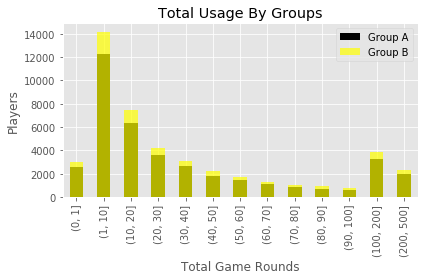

In [10]:
# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_GA[:50].plot(kind = 'bar', y="userid", color = "black", alpha = 1, 
                       title = 'Total Usage By Groups')
plot_GB[:50].plot(kind = 'bar', y="userid", ax=ax, color = "yellow", alpha = 0.7)
ax.set_xlabel("Total Game Rounds")
ax.set_ylabel("Players")
plt.legend(["Group A", "Group B"])
plt.tight_layout()
plt.grid(True)

The distribution on the chart shows that the players played at most 1-10 rounds. It is seen that the addiction of the players who enter the game with Facebook is more than the ones who enter the game as a guest.

### Part 4. Comparing 1-day Retention

In the plot above we can see that some players install the game but then never play it, some players just play a couple of game rounds in their first week, and some get really hooked! What we want is for players to like the game and to get hooked.

A common metric in the video gaming industry for how fun and engaging a game is **1-day retention: the percentage of players that comes back and plays the game one day after they have installed it.** The higher 1-day retention is, the easier it is to retain players and build a large player base.


**Overall 1-day retention**

In [11]:
df['retention_1'].sum() / df['retention_1'].count() # When using .sum(), T/F will first be converted to 1/0.

# Equivalent to df['retention_1'].mean()
# Mean is calculated by summing the values and dividing by the total number of values.

0.4452095044850259

A little less than half of the players come back one day after installing the game. Now that we have a benchmark, let's look at how 1-day retention differs between the two AB-groups.

**1-day retention for each AB-group**

In [12]:
df.groupby('version')['retention_1'].mean()

version
facebook    0.447582
guest       0.442417
Name: retention_1, dtype: float64

It appears that **there was a slight decrease in 1-day retention when users register as a quest (44.2%)** compared to the control when it was users register with Facebook (44.8%). It's a small change, but even small changes in retention can have a large impact. But while we are certain of the difference in the data, how certain should we be that a gate at level 40 will be worse in the future?

There are a couple of ways we can get at the certainty of these retention numbers. Here we will use bootstrapping: We will repeatedly re-sample our dataset (with replacement) and calculate 1-day retention for those samples. The variation in 1-day retention will give us an indication of how uncertain the retention numbers are.

**Bootstrapping: Should we be confident in the difference?**

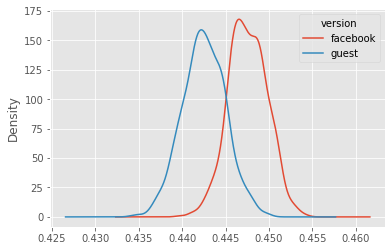

In [13]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = df.sample(frac = 1,replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [14]:
boot_1d

version,facebook,guest
retention_1,0.448909,0.446277
retention_1,0.445582,0.446270
retention_1,0.445826,0.442766
retention_1,0.446579,0.444110
retention_1,0.444567,0.441496
...,...,...
retention_1,0.445049,0.445931
retention_1,0.445839,0.443958
retention_1,0.450850,0.439217
retention_1,0.447159,0.440459


These two distributions above represent the bootstrap uncertainty over what the underlying 1-day retention could be for the two AB-groups. There seems to be some evidence of a difference, albeit small. Let's plot the % difference to have a closer look.

Probability that 1-day retention is greater when users register with Facebook: 0.944


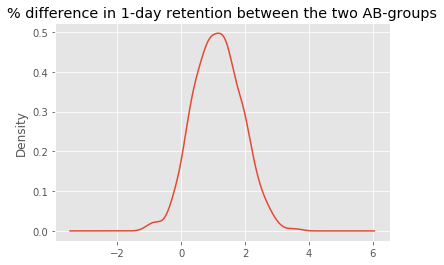

In [15]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = (boot_1d['facebook'] - boot_1d['guest'])/boot_1d['guest']*100

# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

# Calculating the probability that 14-day retention is greater when users register with Facebook
print('Probability that 1-day retention is greater when users register with Facebook:',(boot_1d['diff'] > 0).mean())

From this chart, we can see that the most likely % difference is around 1% - 2%, and that 94% of the distribution is above 0%, in favor of Facebook.

### Part 5. Comparing 7-day Retention 

The bootstrap analysis tells us that there is a high probability that 1-day retention is better when users register with Facebook. However, since players have only been playing the game for one day, it is likely that most players haven't played with Facebook friends yet.

But after having played for a week, more players should play with Facebook friends, and therefore it makes sense to also look at 7-day retention.

In [16]:
df.groupby('version')['retention_7'].sum() / df.groupby('version')['retention_7'].count()

version
facebook    0.186805
guest       0.185193
Name: retention_7, dtype: float64

**Insights:**

**Like with 1-day retention, 7-day retention is slightly lower when users register as guests(18.51%)** than when users register with Facebook(18.68%).

The overall 7-day retention is lower than the overall 1-day retention; fewer people play a game a week after installing than a day after installing.

But as before, let's use bootstrap analysis to figure out how certain we should be of the difference between the AB-groups.

Probability that 7-day retention is greater when users register with Facebook: 0.732


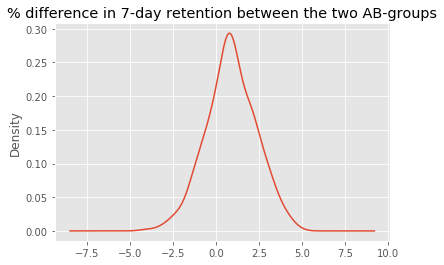

In [17]:
# Creating a list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)

# Adding a column with the % difference between the two AB-groups
boot_7d['diff'] = (boot_7d['facebook'] - boot_7d['guest'])/boot_7d['guest']*100

# Ploting the bootstrap % difference
ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')

# Calculating the probability that 14-day retention is greater when users register with Facebook
print('Probability that 7-day retention is greater when users register with Facebook:',(boot_7d['diff'] > 0).mean())

### Part 6. Comparing 14-day Retention

The bootstrap analysis tells us that there is a high probability that 1-day and 7-day retention is better when users register with Facebook.
But after having played for two week, more players should play with Facebook friends, and therefore it makes sense to also look at 14-day retention.

In [18]:
df.groupby('version')['retention_14'].sum() / df.groupby('version')['retention_14'].count()

version
facebook    0.186600
guest       0.184276
Name: retention_14, dtype: float64

**Insights:**

**Like with 14-day retention, 14-day retention is slightly lower when users register as a guests(18.42%)** than when users register with Facebook(18.66%).

The overall 14-day retention is lower than the overall 1-day retention; fewer people play a game two week after installing than a day after installing.

But as before, let's use bootstrap analysis to figure out how certain we should be of the difference between the AB-groups.

Probability that 14-day retention is greater when users register with Facebook: 0.828


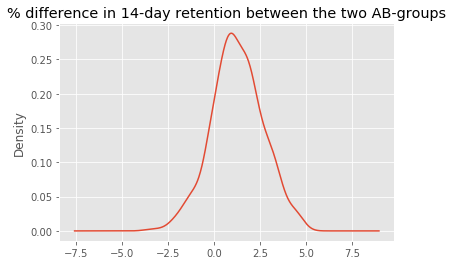

In [19]:
# Creating a list with bootstrapped means for each AB-group
boot_14d = []
for i in range(500):
    boot_mean = df.sample(frac=1,replace=True).groupby('version')['retention_14'].mean()
    boot_14d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_14d = pd.DataFrame(boot_14d)

# Adding a column with the % difference between the two AB-groups
boot_14d['diff'] = (boot_14d['facebook'] - boot_14d['guest'])/boot_14d['guest']*100

# Ploting the bootstrap % difference
ax = boot_14d['diff'].plot(kind='density')
ax.set_title('% difference in 14-day retention between the two AB-groups')

# Calculating the probability that 14-day retention is greater when users register with Facebook
print('Probability that 14-day retention is greater when users register with Facebook:',(boot_14d['diff'] > 0).mean())

### Part 7. Conclusion 

The bootstrap result tells us that there is strong evidence that 7-day retention is higher when users register with Facebook than when register as a guest. 

**The conclusion is:** If we want to keep retention high — 1-day, 7-day retention, 14-retention — we should support people register with Facebook

There are, of course, other metrics we could look at, like the number of game rounds played or how much in-game purchases are made by the two AB-groups. But retention is one of the most important metrics. If we don't retain our player base, it doesn't matter how much money they spend in-game.

So, why is retention higher when users register with Facebook? One could expect the opposite: The later the obstacle, the longer people are going to engage with the game. But this is not what the data tells us. The theory of hedonic adaptation can give one explanation for this.

In short, hedonic adaptation is the tendency for people to get less and less enjoyment out of a fun activity over time if that activity is undertaken continuously. By forcing players to invite people from Facebook, their enjoyment of the game is prolonged. But when , fewer players make it far enough, and they are more likely to quit the game because they simply got bored of it.